### Student Information
Name:吳權晏

Student ID:108061538

GitHub ID:ChuanYenWu

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

## Part 1: Take home exercise

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

###  >>> Exercise 2 (take home):
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [4]:
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [5]:
X

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
...                      ...  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med  

[2257 rows x 3 columns]

#### Answer here

In [6]:
#use query to find specific category
X.query('category==0')

text  category  \
12    From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   
13    Subject: So what is Maddi? From: madhaus@netco...         0   
17    Organization: Penn State University From: <JSN...         0   
19    Subject: Re: Don't more innocents die without ...         0   
21    From: gmiller@worldbank.org (Gene C. Miller) S...         0   
...                                                 ...       ...   
2231  Subject: Re: Feminism and Islam, again From: k...         0   
2233  From: kmr4@po.CWRU.edu (Keith M. Ryan) Subject...         0   
2234  From: David.Rice@ofa123.fidonet.org Subject: i...         0   
2237  From: datepper@phoenix.Princeton.EDU (David Aa...         0   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   

     category_name  
12     alt.atheism  
13     alt.atheism  
17     alt.atheism  
19     alt.atheism  
21     alt.atheism  
...            ...  
2231   alt.atheism  
2233   alt.atheism  
2234   alt.atheism  
2237   alt.atheism  
2250   alt.atheism  

[480 rows x 3 columns]

In [7]:
# using loc (selecting column in range by loc(label))
X.loc[::10, 'category':'category_name'][:10]

category           category_name
0          1           comp.graphics
10         3  soc.religion.christian
20         3  soc.religion.christian
30         2                 sci.med
40         3  soc.religion.christian
50         1           comp.graphics
60         0             alt.atheism
70         3  soc.religion.christian
80         2                 sci.med
90         0             alt.atheism

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [8]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [9]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#### Answer here
for id A and id E, they get np.nan and None, which is null in value, so they get True in isnull() <br />
for id B, it doesn't get value of 'missing_example', so it is also a None in value, True in isnull() <br />
for id C and id D, they get a **string** in 'missing_example', so they get False in isnull() (even the string write NaN, None) <br />
for id F, interestingly, it has a **empty string** in 'missing_example', it get False in isnull(), if we want to find  out problem like this, we could use something like the code below

In [10]:
np.where(NA_df['missing_example'].map(lambda x: x == ''))

(array([5], dtype=int64),)

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [11]:
X_sample = X.sample(n=1000) #random state
len(X_sample)

1000

In [12]:
X_sample[0:4]

text  category  \
445   From: conditt@tsd.arlut.utexas.edu (Paul Condi...         3   
2014  From: bryanw@rahul.net (Bryan Woodworth) Subje...         1   
1211  From: paulson@tab00.larc.nasa.gov (Sharon Paul...         2   
1109  From: mcovingt@aisun3.ai.uga.edu (Michael Covi...         2   

               category_name  
445   soc.religion.christian  
2014           comp.graphics  
1211                 sci.med  
1109                 sci.med

#### Answer here
Obviously, the sample one get smaller size than the previous. <br />
Also, because of random sellecting, the ratio of each category may change. <br />
And because of the random sellecting, the order is changing. <br />
More, everytime we sample, we'll get a different sample set and sample order.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [13]:
import matplotlib.pyplot as plt
two_bar=pd.DataFrame(columns =['X','X_sample'])
for i in categories:
    two_bar.loc[i,"X"]=X.category_name.value_counts().loc[i]
    two_bar.loc[i,"X_sample"]=X_sample.category_name.value_counts().loc[i]

#### Answer here

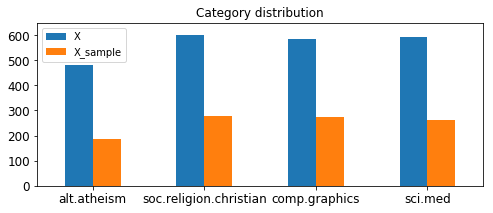

In [14]:
M=max(two_bar.max())
two_bar.plot(kind = 'bar',
             title = 'Category distribution',
             ylim = [0, M+50], 
             rot = 0, fontsize = 12, figsize = (8,3))

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [15]:
import nltk
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))


from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

#### Answer here

In [16]:
# getting nonzero index
nonzero_index = np.nonzero( X_counts[4, 0:100].toarray().reshape((100)) )
np.nonzero( X_counts[4, 0:100].toarray().reshape((100)) )

(array([ 0, 37], dtype=int64),)

In [17]:
for i in nonzero_index[0]:
    print(count_vect.get_feature_names()[i])

00
01


So we get the other word is the `01` term.

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

#### Answer here
Dealing with term-document matrix, for getting the really meaningful and useful term, we can set a minimum threshold (can set a maximum also)

In [18]:
k=np.asarray(X_counts.sum(axis=0))[0]
index=[]

MIN_FREQ_ALLOWED = 50

for i in range(0,len(k)):
    if k[i]>MIN_FREQ_ALLOWED :
        index.append(i)
np.asarray(index).shape
#index

(1614,)

In [19]:
#term choosing
plot_x=[]
plot_z=np.empty(shape=[len(X.index),0])
for i in index[0:100]:
    plot_x.append("term_"+str(count_vect.get_feature_names()[i]))
    plot_z=np.hstack((plot_z,X_counts[:,i].toarray()))

In [20]:
# document choosing
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:100]]

plot_z_cut = plot_z[0:100,:]

So we can get a matrix more concentrate on term that use frequently

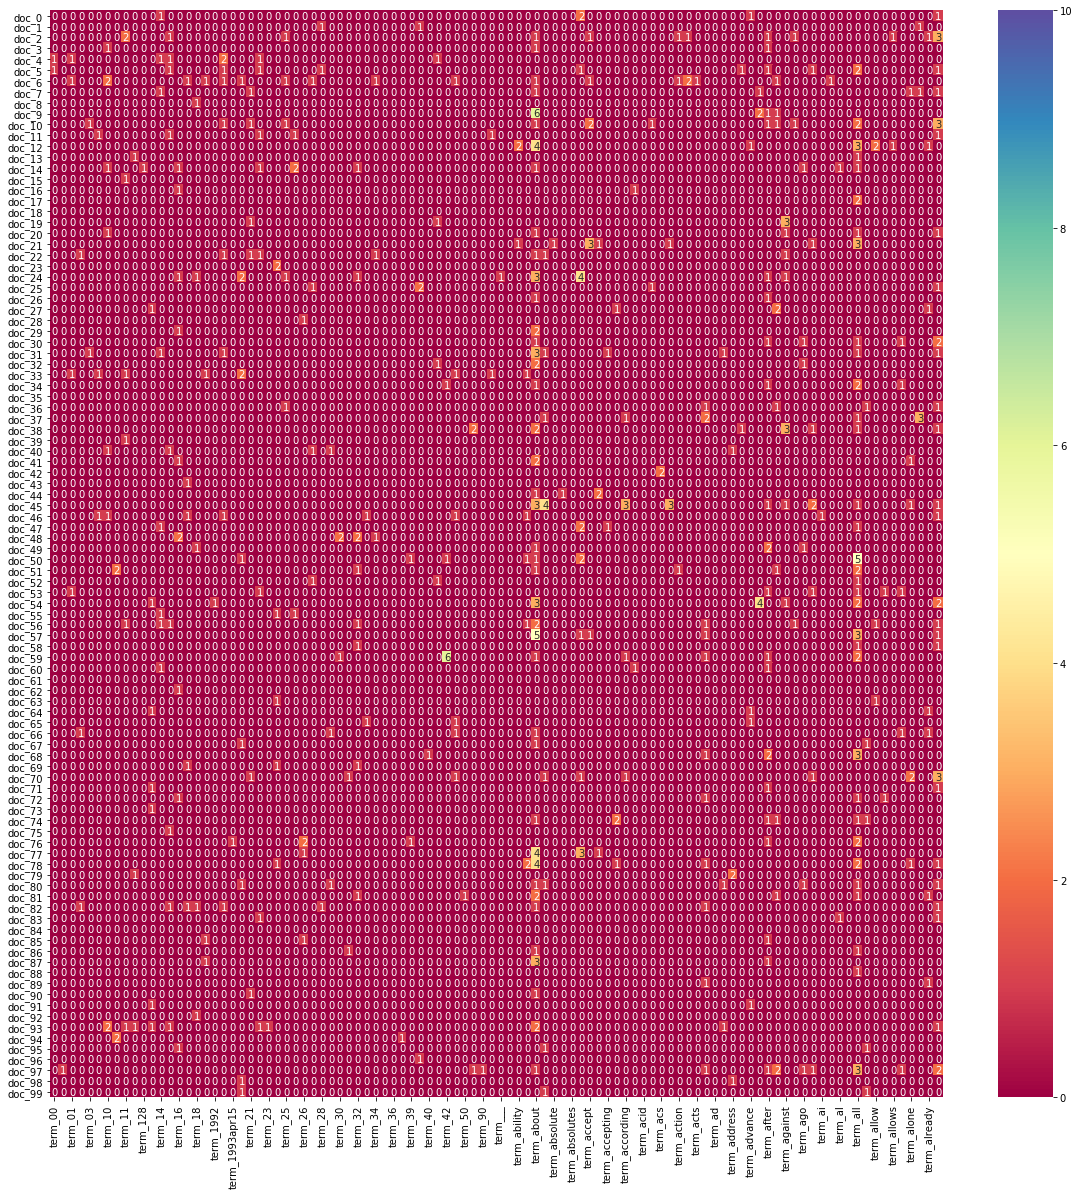

In [21]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z_cut, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 20))
ax = sns.heatmap(df_todraw,
                 cmap="Spectral",
                 vmin=0, vmax=10, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [22]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape

(2257, 3)

#### Answer here
It seems every category squeezes together when dimension=2 <br/>
When dimension=3, in 3D picture below, it seems that we can seperate categories into slices.  

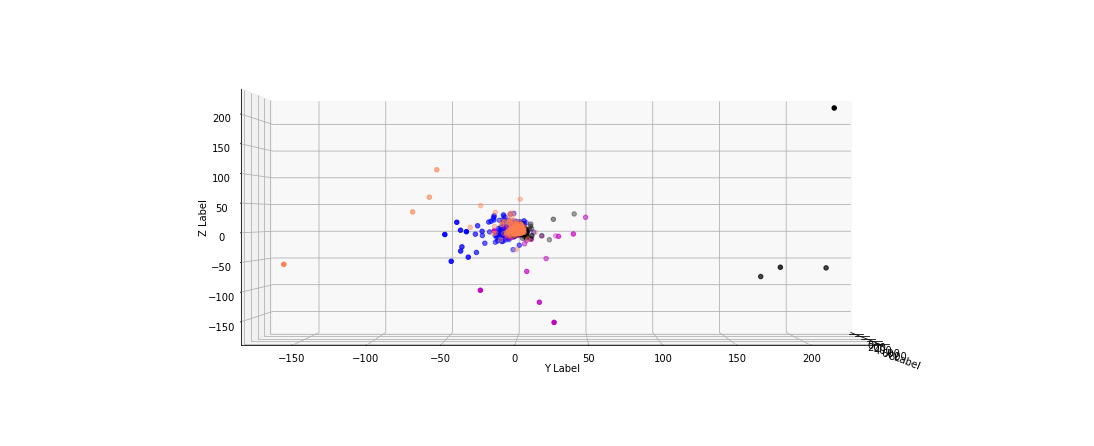

In [23]:
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue', 'black', 'm']
#categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# plot
fig = plt.figure(figsize = (15,6))
#ax = fig.add_subplot(111, projection='3d')
ax=Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    
    ax.scatter(xs, ys, zs, c = c, marker='o')
    
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax.view_init(elev=0, azim=0)

plt.show()

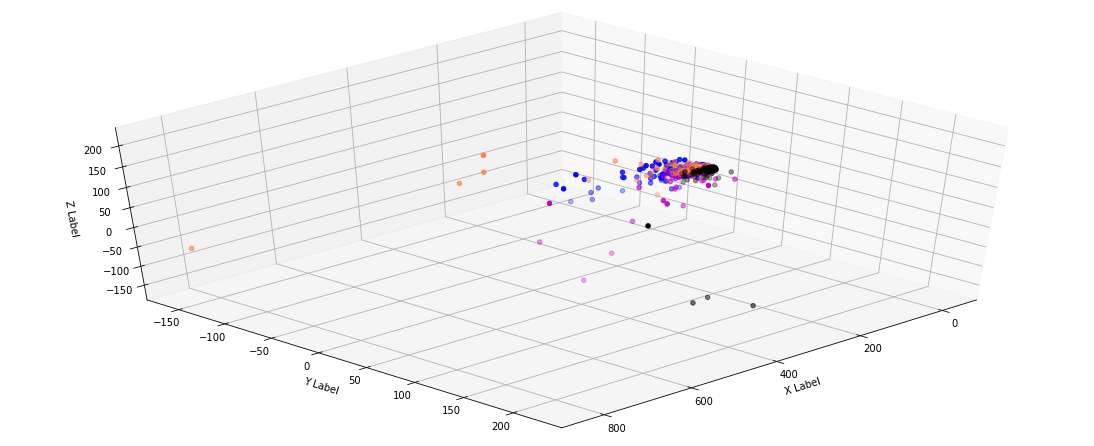

In [24]:
# plot
fig = plt.figure(figsize = (15,6))
#ax = fig.add_subplot(111, projection='3d')
ax=Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    
    ax.scatter(xs, ys, zs, c = c, marker='o')
    
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax.view_init(elev=45, azim=45)

plt.show()

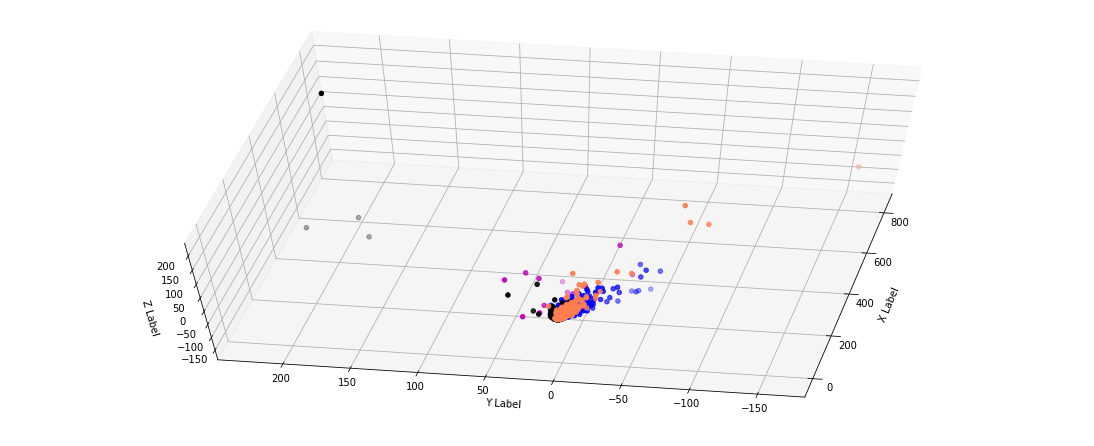

In [25]:
# plot
fig = plt.figure(figsize = (15,6))
#ax = fig.add_subplot(111, projection='3d')
ax=Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    
    ax.scatter(xs, ys, zs, c = c, marker='o')
    
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax.view_init(elev=60, azim=190)

plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

#### Answer here

In [26]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [27]:
import plotly.graph_objs as go
plotdata = [go.Bar(
   x = count_vect.get_feature_names()[:300],
   y = term_frequencies[:300]
)]
layout = go.Layout(xaxis=dict(type='category'))     #layout setting for int-like string in X, such as '00', '0000'
fig = go.Figure(data=plotdata,layout=layout)            #  plotly see it as integer, so we need layout setting
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


#### Answer here
show 50 terms that appear more than 100 times

In [28]:
k=np.asarray(X_counts.sum(axis=0))[0]
index=[]

MIN_FREQ_ALLOWED = 100

for i in range(0,len(k)):
    if k[i]>MIN_FREQ_ALLOWED :
        index.append(i)
#np.asarray(index).shape

term_100=[]
freq_100=[]
for i in index[0:50]:
    term_100.append(count_vect.get_feature_names()[i])
    freq_100=np.hstack((freq_100,term_frequencies[i]))

In [29]:
plotdata = [go.Bar(
   x = term_100,
   y = freq_100
)]
layout = go.Layout(xaxis=dict(type='category'))     #layout setting for int-like string in X, such as '00', '0000'
fig = go.Figure(data=plotdata,layout=layout)            #  plotly see it as integer, so we need layout setting
fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

#### Answer here

In [30]:
sort_index=np.argsort(term_frequencies)   #array index sort in small~big
reverse_index=np.flip(sort_index)         #reverse array index

x=[]
y=[]
for i in reverse_index[:300]:
    x.append(count_vect.get_feature_names()[i])
    y.append(term_frequencies[i])

In [31]:
plotdata = [go.Bar(
   x = x,
   y = y
)]
layout = go.Layout(xaxis=dict(type='category'))     #layout setting for int-like string in X, such as '00', '0000'
fig = go.Figure(data=plotdata,layout=layout)            #  plotly see it as integer, so we need layout setting
fig.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

#### Answer here
By code below, we can find it works, so we can know binarizer also accept *string* type

In [32]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)

X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category  
0  [0, 1, 0, 0]  
1  [0, 1, 0, 0]  
2  [0, 0, 0, 1]  
3  [0, 0, 0, 1]  
4  [0, 0, 0, 1]  
5  [0, 0, 0, 1]  
6  [0, 0, 0, 1]  
7  [0, 0, 1, 0]  
8  [0, 0, 1, 0]

In [33]:
mlb.classes_

array(['alt.atheism', 'comp.graphics', 'sci.med',
       'soc.religion.christian'], dtype='<U22')

## Part 2:same process on new dataset

### 1. The Data
Sentiment Labelled Sentences Data Set

### 2. Data Preparation
download the zip file and unzip it. Put the 'sentiment labelled sentences' file in the 'data' file <br/>
read the txt files and turn them to the dataframe with 3 columns: sentence, label, provider_name

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import os
here = os.path.dirname(__file__) if "__file__" in locals() else "."

files = [("amazon", os.path.join(here, "data/sentiment labelled sentences/amazon_cells_labelled.txt")),
         ("imdb", os.path.join(here, "data/sentiment labelled sentences/imdb_labelled.txt")),
         ("yelp", os.path.join(here, "data/sentiment labelled sentences/yelp_labelled.txt"))]
    
dfs = []             
for provider, name in files:
    df = pd.read_csv(name, sep="\t",header=None, quoting=3)
    df.columns = ["sentence", "label"]
    df["provider_name"] = provider
    dfs.append(df)
    
data = pd.concat(dfs, axis=0,ignore_index=True)
print(data.head())

print("shape", data.shape)

                                            sentence  label provider_name
0  So there is no way for me to plug it in here i...      0        amazon
1                        Good case, Excellent value.      1        amazon
2                             Great for the jawbone.      1        amazon
3  Tied to charger for conversations lasting more...      0        amazon
4                                  The mic is great.      1        amazon
shape (3000, 3)


### 3. Data Transformation
because it's pandas dataframe already, we don't need to transform, but we can add so column if we need

In [35]:
def provider_num(target):
    """ format the labels """
    if target == 'amazon':
        ans=0
    elif target == 'imdb':
        ans=1
    elif target == 'yelp':
        ans=2
    else:
        ans=None
    return ans

def scoring(target):

    if target == 1:
        ans= 'pos'
    elif target == 0:
        ans='neg'
    else:
        ans=None

    return ans

In [36]:
data['provider'] = data.provider_name.apply(lambda t: provider_num(t))
data['score'] = data.label.apply(lambda t: scoring(t))

In [37]:
data.head()

sentence  label provider_name  \
0  So there is no way for me to plug it in here i...      0        amazon   
1                        Good case, Excellent value.      1        amazon   
2                             Great for the jawbone.      1        amazon   
3  Tied to charger for conversations lasting more...      0        amazon   
4                                  The mic is great.      1        amazon   

   provider score  
0         0   neg  
1         0   pos  
2         0   pos  
3         0   neg  
4         0   pos

#### familiar with data

In [38]:
data[0:10][['sentence','label']]

sentence  label
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1
5  I have to jiggle the plug to get it to line up...      0
6  If you have several dozen or several hundred c...      0
7        If you are Razr owner...you must have this!      1
8                Needless to say, I wasted my money.      0
9                   What a waste of money and time!.      0

In [39]:
data.iloc[::10, 0:2][0:10]

sentence  label
0   So there is no way for me to plug it in here i...      0
10                    And the sound quality is great.      1
20  I went on Motorola's website and followed all ...      0
30  This is a simple little phone to use, but the ...      0
40  It has a great camera thats 2MP, and the pics ...      1
50  Not loud enough and doesn't turn on like it sh...      0
60  Essentially you can forget Microsoft's tech su...      0
70                                  Mic Doesn't work.      0
80      I wear it everyday and it holds up very well.      1
90  For a product that costs as much as this one d...      0

In [40]:
data.loc[::10, 'score'][0:10]

0     neg
10    pos
20    neg
30    neg
40    pos
50    neg
60    neg
70    neg
80    pos
90    neg
Name: score, dtype: object

### 4. Data Mining using Pandas

#### Missing value

In [41]:
data.isnull()

sentence  label  provider_name  provider  score
0        False  False          False     False  False
1        False  False          False     False  False
2        False  False          False     False  False
3        False  False          False     False  False
4        False  False          False     False  False
...        ...    ...            ...       ...    ...
2995     False  False          False     False  False
2996     False  False          False     False  False
2997     False  False          False     False  False
2998     False  False          False     False  False
2999     False  False          False     False  False

[3000 rows x 5 columns]

In [42]:
import helpers.data_mining_helpers as dmh
data.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence         (The amoung of missing records is: , 0)
label            (The amoung of missing records is: , 0)
provider_name    (The amoung of missing records is: , 0)
provider         (The amoung of missing records is: , 0)
score            (The amoung of missing records is: , 0)
dtype: object

####  Duplicate Data

In [43]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [44]:
sum(data.duplicated())

17

##### only drop duplicate one(keep the first one)

In [45]:
data.drop_duplicates( inplace=True) # inplace applies changes directly on our dataframe

In [46]:
len(data)

2983

### 5. Data Preprocessing

#### sampling

In [47]:
data_sample = data.sample(n=1000) #random state
print(data.provider_name.value_counts())
print(data.score.value_counts())

imdb      997
yelp      996
amazon    990
Name: provider_name, dtype: int64
neg    1493
pos    1490
Name: score, dtype: int64


In [48]:
print(data_sample.provider_name.value_counts())
print(data_sample.score.value_counts())

yelp      346
imdb      336
amazon    318
Name: provider_name, dtype: int64
neg    500
pos    500
Name: score, dtype: int64


#### we can get both the distribution of provider and the distribution of pos-neg score

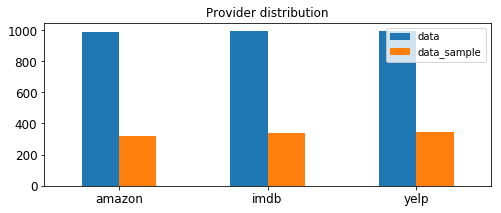

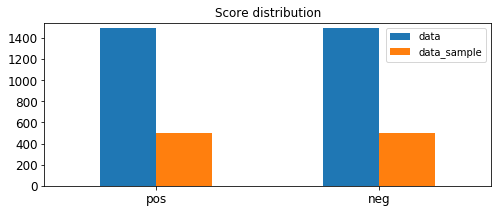

In [49]:
import matplotlib.pyplot as plt

two_bar_provider=pd.DataFrame(columns =['data','data_sample'])
for i in ['amazon','imdb','yelp']:
    two_bar_provider.loc[i,"data"]=data.provider_name.value_counts().loc[i]
    two_bar_provider.loc[i,"data_sample"]=data_sample.provider_name.value_counts().loc[i]
    
two_bar_score=pd.DataFrame(columns =['data','data_sample'])
for i in ['pos','neg']:
    two_bar_score.loc[i,"data"]=data.score.value_counts().loc[i]
    two_bar_score.loc[i,"data_sample"]=data_sample.score.value_counts().loc[i]
    
M=max(two_bar_provider.max())
two_bar_provider.plot(kind = 'bar',
             title = 'Provider distribution',
             ylim = [0, M+50], 
             rot = 0, fontsize = 12, figsize = (8,3))

M=max(two_bar_score.max())
two_bar_score.plot(kind = 'bar',
             title = 'Score distribution',
             ylim = [0, M+50], 
             rot = 0, fontsize = 12, figsize = (8,3))

#### Feature Creation

In [50]:
import nltk

data['unigrams'] = data['sentence'].apply(lambda x: dmh.tokenize_text(x))
data[0:4]

sentence  label provider_name  \
0  So there is no way for me to plug it in here i...      0        amazon   
1                        Good case, Excellent value.      1        amazon   
2                             Great for the jawbone.      1        amazon   
3  Tied to charger for conversations lasting more...      0        amazon   

   provider score                                           unigrams  
0         0   neg  [So, there, is, no, way, for, me, to, plug, it...  
1         0   pos               [Good, case, ,, Excellent, value, .]  
2         0   pos                      [Great, for, the, jawbone, .]  
3         0   neg  [Tied, to, charger, for, conversations, lastin...

#### Feature subset selection

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.sentence)
data_counts.shape

(2983, 5155)

In [52]:
data_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

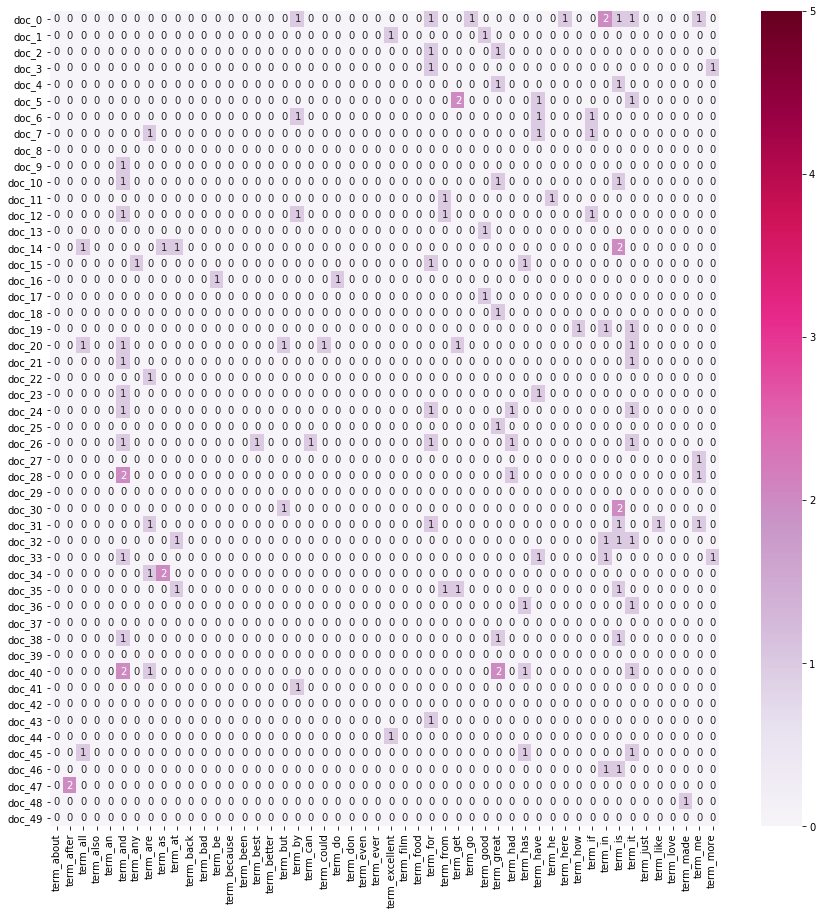

In [53]:
import numpy as np

#plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
#plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]
#plot_z = data_counts[0:20, 0:20].toarray()

#set threshold
k=np.asarray(data_counts.sum(axis=0))[0]
index=[]

MIN_FREQ_ALLOWED = 50

for i in range(0,len(k)):
    if k[i]>MIN_FREQ_ALLOWED :
        index.append(i)
#np.asarray(index).shape

#term choosing
plot_x=[]
plot_z=np.empty(shape=[len(data.index),0])
for i in index[0:50]:
    plot_x.append("term_"+str(count_vect.get_feature_names()[i]))
    plot_z=np.hstack((plot_z,data_counts[:,i].toarray()))
    
# document choosing
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:50]]

plot_z_cut = plot_z[0:50,:]


import seaborn as sns

df_todraw = pd.DataFrame(plot_z_cut, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 15))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=5, annot=True)

#### Dimensionality Reduction(PCA)

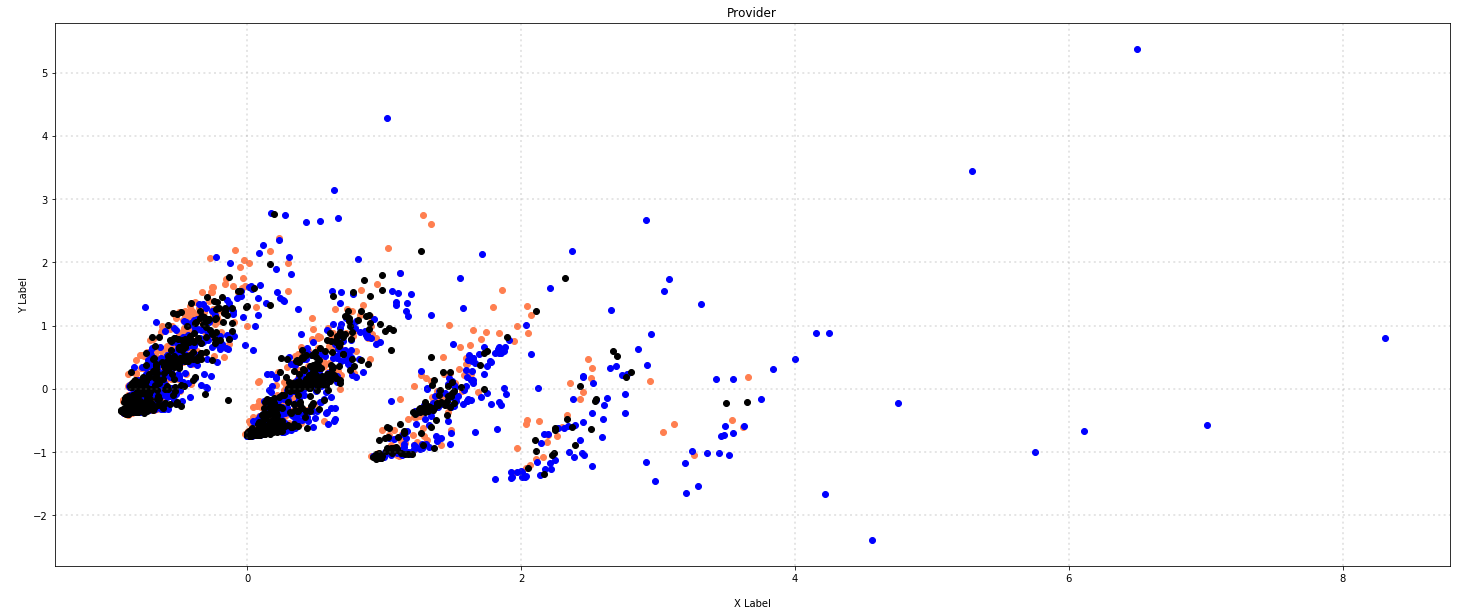

Text(0.5, 1.0, 'Score')

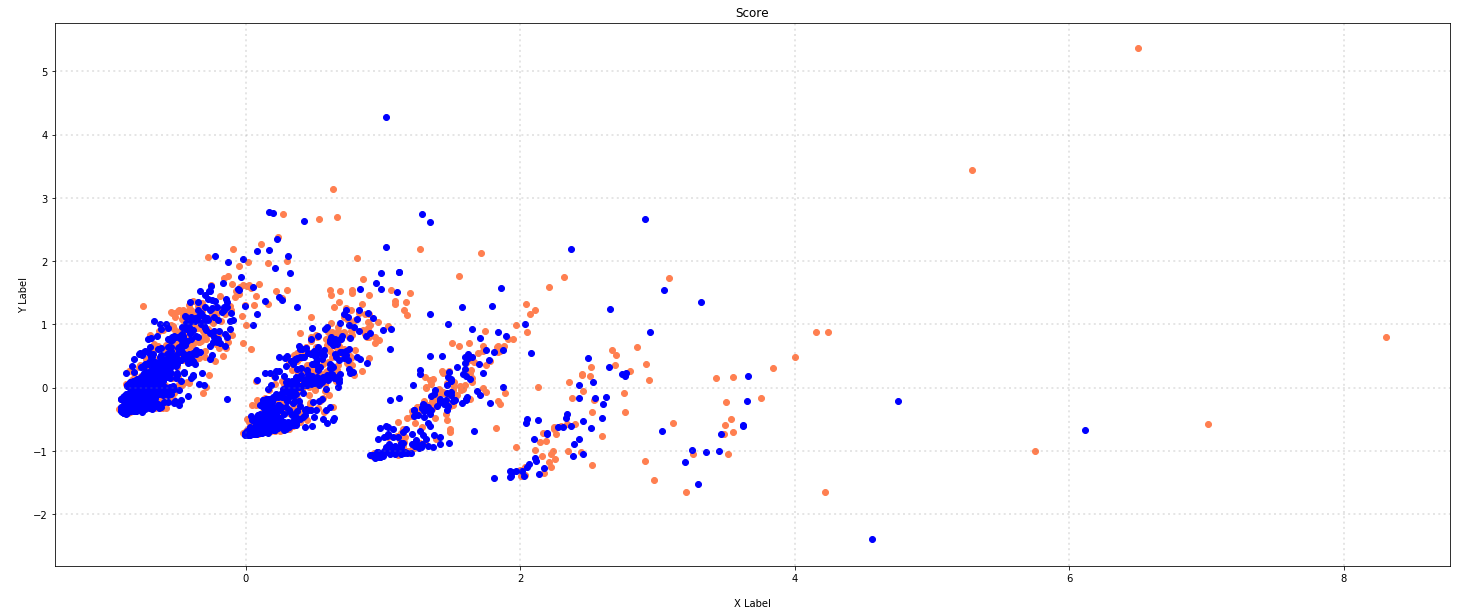

In [54]:
from sklearn.decomposition import PCA

data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())
################################provider
provi=['amazon','imdb','yelp']
col = ['coral', 'blue', 'black']

fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, provider in zip(col, provi):
    xs = data_reduced[data['provider_name'] == provider].T[0]
    ys = data_reduced[data['provider_name'] == provider].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_title('Provider')

plt.show()
############################score
score=['pos','neg']
col = ['coral', 'blue']

fig2 = plt.figure(figsize = (25,10))
ax2 = fig2.subplots()

for c, sco in zip(col, score):
    xs = data_reduced[data['score'] == sco].T[0]
    ys = data_reduced[data['score'] == sco].T[1]
   
    ax2.scatter(xs, ys, c = c, marker='o')

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_title('Score')

#### Dimensionality Reduction(PCA) to 3D

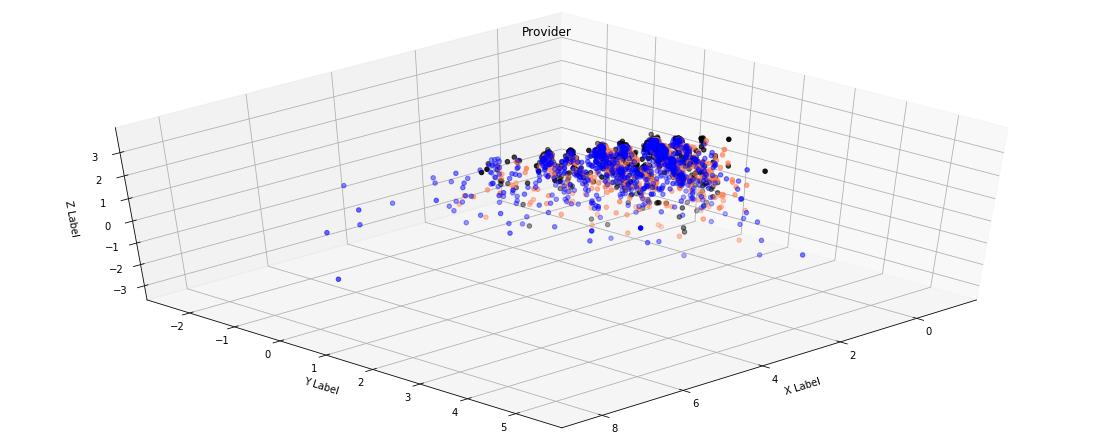

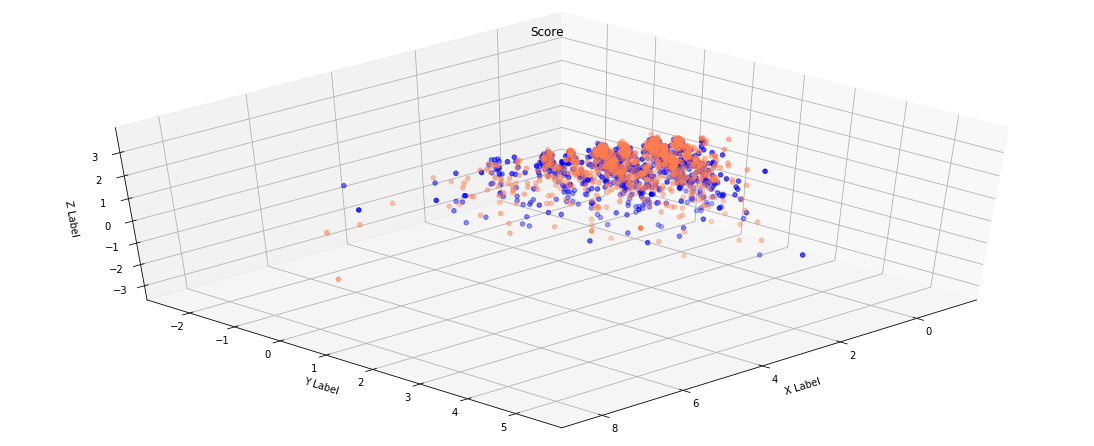

In [55]:
from mpl_toolkits.mplot3d import Axes3D

data_reduced = PCA(n_components = 3).fit_transform(data_counts.toarray())
####################################provider
col = ['coral', 'blue', 'black']
provi=['amazon','imdb','yelp']
#categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# plot
fig = plt.figure(figsize = (15,6))
#ax = fig.add_subplot(111, projection='3d')
ax=Axes3D(fig)

for c, provider in zip(col, provi):
    xs = data_reduced[data['provider_name'] == provider].T[0]
    ys = data_reduced[data['provider_name'] == provider].T[1]
    zs = data_reduced[data['provider_name'] == provider].T[2]
    
    ax.scatter(xs, ys, zs, c = c, marker='o')
    
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.set_title('Provider')

ax.view_init(elev=45, azim=45)

plt.show()
##################################score
score=['pos','neg']
col = ['coral', 'blue']

fig2 = plt.figure(figsize = (15,6))
#ax = fig.add_subplot(111, projection='3d')
ax2=Axes3D(fig2)

for c, sco in zip(col, score):
    xs = data_reduced[data['score'] == sco].T[0]
    ys = data_reduced[data['score'] == sco].T[1]
    zs = data_reduced[data['score'] == sco].T[2]
    
    ax2.scatter(xs, ys, zs, c = c, marker='o')
    
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')
ax2.set_title('Score')

ax2.view_init(elev=45, azim=45)

plt.show()

#### Atrribute Transformation / Aggregation

In [56]:
import plotly.graph_objs as go

term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

plotdata = [go.Bar(
   x = count_vect.get_feature_names()[:300],
   y = term_frequencies[:300]
)]
layout = go.Layout(xaxis=dict(type='category'))     #layout setting for int-like string in X, such as '00', '0000'
fig = go.Figure(data=plotdata,layout=layout)            #  plotly see it as integer, so we need layout setting
fig.show()

show 50 terms that appear more than 100 times

In [57]:
k=np.asarray(data_counts.sum(axis=0))[0]
index=[]

MIN_FREQ_ALLOWED = 100

for i in range(0,len(k)):
    if k[i]>MIN_FREQ_ALLOWED :
        index.append(i)
#np.asarray(index).shape

term_100=[]
freq_100=[]
for i in index[0:50]:
    term_100.append(count_vect.get_feature_names()[i])
    freq_100=np.hstack((freq_100,term_frequencies[i]))
    
plotdata = [go.Bar(
   x = term_100,
   y = freq_100
)]
layout = go.Layout(xaxis=dict(type='category'))     #layout setting for int-like string in X, such as '00', '0000'
fig = go.Figure(data=plotdata,layout=layout)            #  plotly see it as integer, so we need layout setting
fig.show()

#### plot out from max to min(tine first 300 terms)

In [58]:
sort_index=np.argsort(term_frequencies)   #array index sort in small~big
reverse_index=np.flip(sort_index)         #reverse array index

x=[]
y=[]
for i in reverse_index[:300]:
    x.append(count_vect.get_feature_names()[i])
    y.append(term_frequencies[i])
    
plotdata = [go.Bar(
   x = x,
   y = y
)]
layout = go.Layout(xaxis=dict(type='category'))     #layout setting for int-like string in X, such as '00', '0000'
fig = go.Figure(data=plotdata,layout=layout)            #  plotly see it as integer, so we need layout setting
fig.show()

#### Discretization and Binarization
Binarize the provider (score only have pos and neg two type so don't need it)

In [59]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
############provider
mlb = preprocessing.LabelBinarizer()
mlb.fit(data.provider)

data['bin_provider'] = mlb.transform(data['provider']).tolist()


data[0:9]

sentence  label provider_name  \
0  So there is no way for me to plug it in here i...      0        amazon   
1                        Good case, Excellent value.      1        amazon   
2                             Great for the jawbone.      1        amazon   
3  Tied to charger for conversations lasting more...      0        amazon   
4                                  The mic is great.      1        amazon   
5  I have to jiggle the plug to get it to line up...      0        amazon   
6  If you have several dozen or several hundred c...      0        amazon   
7        If you are Razr owner...you must have this!      1        amazon   
8                Needless to say, I wasted my money.      0        amazon   

   provider score                                           unigrams  \
0         0   neg  [So, there, is, no, way, for, me, to, plug, it...   
1         0   pos               [Good, case, ,, Excellent, value, .]   
2         0   pos                      [Great, for, the, jawbone, .]   
3         0   neg  [Tied, to, charger, for, conversations, lastin...   
4         0   pos                           [The, mic, is, great, .]   
5         0   neg  [I, have, to, jiggle, the, plug, to, get, it, ...   
6         0   neg  [If, you, have, several, dozen, or, several, h...   
7         0   pos  [If, you, are, Razr, owner, ..., you, must, ha...   
8         0   neg    [Needless, to, say, ,, I, wasted, my, money, .]   

  bin_provider  
0    [1, 0, 0]  
1    [1, 0, 0]  
2    [1, 0, 0]  
3    [1, 0, 0]  
4    [1, 0, 0]  
5    [1, 0, 0]  
6    [1, 0, 0]  
7    [1, 0, 0]  
8    [1, 0, 0]

#### Data Exploration

In [60]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = data.iloc[100]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[200]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[300]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [61]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Integrated seamlessly with the Motorola RAZR phone.']
['The color is even prettier than I thought it would be, and the graphics are incredibly sharp.']
['Now I know that I made a wise decision.']


In [62]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [63]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.178174
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


## Part3: Some attempt on new dataset

#### 1. new data visualizations
first produce a new type dataframe for easier putting it into the plotting function

In [64]:
full_data_counts=data_counts.toarray()
full_data_counts.shape

(2983, 5155)

distinguish the 2 score(pos,neg) and 3 provider(amazon, imdb, yelp)

In [65]:
neg_amazon=[]
neg_imdb=[]
neg_yelp=[]
pos_amazon=[]
pos_imdb=[]
pos_yelp=[]

arraydata=np.array(data)   #change from dataframe to array

for i in range(0,len(full_data_counts)):      #in array , col 4='score', col 2='provider_name'
    if arraydata[i,4]=='neg':
        if arraydata[i,2]=='amazon':
            neg_amazon.append(full_data_counts[i,:])
        elif arraydata[i,2]=='imdb':
            neg_imdb.append(full_data_counts[i,:])
        elif arraydata[i,2]=='yelp':
            neg_yelp.append(full_data_counts[i,:])
    elif arraydata[i,4]=='pos':
        if arraydata[i,2]=='amazon':
            pos_amazon.append(full_data_counts[i,:])
        elif arraydata[i,2]=='imdb':
            pos_imdb.append(full_data_counts[i,:])
        elif arraydata[i,2]=='yelp':
            pos_yelp.append(full_data_counts[i,:])

construct new dataframe

In [66]:
length=len(full_data_counts.T)
index6=range(0,length*6)
anal_data=pd.DataFrame(columns =['term','freq','score','provider_name'],index=index6)

for i in range(0,6):
    anal_data.loc[i*length:i*length+length-1,'term']=count_vect.get_feature_names()
    if i ==0:
        anal_data.loc[i*length:i*length+length-1,'freq']=np.asarray(np.array(neg_amazon).sum(axis=0))
        anal_data.loc[i*length:i*length+length-1,'score']='neg'
        anal_data.loc[i*length:i*length+length-1,'provider_name']='amazon'
    if i ==1:
        anal_data.loc[i*length:i*length+length-1,'freq']=np.asarray(np.array(neg_imdb).sum(axis=0))
        anal_data.loc[i*length:i*length+length-1,'score']='neg'
        anal_data.loc[i*length:i*length+length-1,'provider_name']='imdb'
    if i ==2:
        anal_data.loc[i*length:i*length+length-1,'freq']=np.asarray(np.array(neg_yelp).sum(axis=0))
        anal_data.loc[i*length:i*length+length-1,'score']='neg'
        anal_data.loc[i*length:i*length+length-1,'provider_name']='yelp'
    if i ==3:
        anal_data.loc[i*length:i*length+length-1,'freq']=np.asarray(np.array(pos_amazon).sum(axis=0))
        anal_data.loc[i*length:i*length+length-1,'score']='pos'
        anal_data.loc[i*length:i*length+length-1,'provider_name']='amazon'
    if i ==4:
        anal_data.loc[i*length:i*length+length-1,'freq']=np.asarray(np.array(pos_imdb).sum(axis=0))
        anal_data.loc[i*length:i*length+length-1,'score']='pos'
        anal_data.loc[i*length:i*length+length-1,'provider_name']='imdb'
    if i ==5:
        anal_data.loc[i*length:i*length+length-1,'freq']=np.asarray(np.array(pos_yelp).sum(axis=0))
        anal_data.loc[i*length:i*length+length-1,'score']='pos'
        anal_data.loc[i*length:i*length+length-1,'provider_name']='yelp'
            

so the dataframe look like below, we can get the frequency of every term in each type of score and provider

In [67]:
anal_data.freq.astype(str).astype(int)
anal_data
#anal_data.loc[i*length:i*length+length, 'term']

term freq score provider_name
0           00    0   neg        amazon
1           10    1   neg        amazon
2          100    0   neg        amazon
3           11    1   neg        amazon
4           12    1   neg        amazon
...        ...  ...   ...           ...
30925    z500a    0   pos          yelp
30926     zero    0   pos          yelp
30927  zillion    0   pos          yelp
30928   zombie    0   pos          yelp
30929  zombiez    0   pos          yelp

[30930 rows x 4 columns]

change dtype from object to integer

In [68]:
anal_data.freq=anal_data.freq.astype(str).astype(int)
anal_data.freq

0        0
1        1
2        0
3        1
4        1
        ..
30925    0
30926    0
30927    0
30928    0
30929    0
Name: freq, Length: 30930, dtype: int32

We can plot out a bubble plot3D, it can display by 3 axes and size and color, so we can distinguish each type of data.<br/>
If we only display some particular term, like the second picture displayed, we can see for term **good** and **great**, it is more frequently in positive than negative. So we can get insight that those term maybe more positive.

In [69]:
sort_anal_data=anal_data.sort_values(by=['term'])

In [70]:
import plotly.express as px
import numpy as np
#df = px.data.gapminder()
fig = px.scatter_3d(anal_data, x='term', y='score', z='freq',   size='freq', color='provider_name',
                    hover_data=['provider_name'])
fig.update_layout()
fig.show()

fig2 = px.scatter_3d(sort_anal_data[11000:13000], x='term', y='score', z='freq',   size='freq', color='provider_name',
                    hover_data=['provider_name'])
fig2.update_layout()
fig2.show()

#### 2. TF-IDF features

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
data_tfidf = tfidf_vect.fit_transform(data.sentence)
data_tfidf.shape

(2983, 5155)

In [72]:
data_tfidf[0:4,0:50].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0. 

In [73]:
tfidf_vect.idf_

array([8.30787278, 5.59982258, 7.6147256 , ..., 8.30787278, 7.90240767,
       8.30787278])

#### 3. Naive Bayes classifier

The difference between word frequency and tfidf is word frequency only count the frequency each term appear in every document.<br/>
But tfidf also get the information of how many documents does each term appear in, if a term appear in every document, it shouldn't be an important term, so it will be divided by  bigger number. In this way, we will not just focus on terms that appear a lot, but on those more meaningful.

In [74]:
from sklearn.naive_bayes import MultinomialNB

MNB_model_wordf = MultinomialNB()            #######word frequency
MNB_model_wordf.fit(data_counts, data['score'])

test_text = count_vect.transform(['This is the worst I\'ve ever seen.' ])   ###try some sentence
MNB_model_wordf.predict(test_text)

array(['neg'], dtype='<U3')

In [75]:
MNB_model_tfidf = MultinomialNB()            ####### tfidf
MNB_model_tfidf.fit(data_tfidf, data['score'])

test_text = tfidf_vect.transform(['This is the worst I\'ve ever seen.' ])   ###try some sentence
MNB_model_tfidf.predict(test_text)

array(['neg'], dtype='<U3')

In [76]:
import math                #get the accuracy of word frequency

countarray=data_counts.toarray()
arrayscore=np.reshape(np.array(data['score']), (len(data['score']),1))
#arrayscore
shufarray=np.append(countarray,arrayscore,axis=1)
np.random.shuffle(shufarray)

MNB_model_testfreq = MultinomialNB()            #######word frequency
MNB_model_testfreq.fit(shufarray[0:math.floor(len(shufarray)*0.9), :-1], shufarray[0:math.floor(len(shufarray)*0.9), -1])

ans=MNB_model_testfreq.predict(shufarray[math.floor(len(shufarray)*0.9):, :-1])
#ans.shape
same=0
for i in range(0,len(ans)):
    if ans[i] == shufarray[math.floor(len(shufarray)*0.9) +i , -1]:
        same=same+1
print('Accuracy of word frequency: %f'%(same/len(ans)))

Accuracy of word frequency: 0.852843


In [77]:
               #get the accuracy of tfidf

tfidfarray=data_tfidf.toarray()
arrayscore=np.reshape(np.array(data['score']), (len(data['score']),1))
#arrayscore
shufarray=np.append(tfidfarray,arrayscore,axis=1)
np.random.shuffle(shufarray)

MNB_model_testtfidf = MultinomialNB()            #######word frequency
MNB_model_testtfidf.fit(shufarray[0:math.floor(len(shufarray)*0.9), :-1], shufarray[0:math.floor(len(shufarray)*0.9), -1])

ans=MNB_model_testtfidf.predict(shufarray[math.floor(len(shufarray)*0.9):, :-1])
#ans.shape
same=0
for i in range(0,len(ans)):
    if ans[i] == shufarray[math.floor(len(shufarray)*0.9) +i , -1]:
        same=same+1
print('Accuracy of TFIDF: %f'%(same/len(ans)))

Accuracy of TFIDF: 0.806020


## Part4: Some improvement on "Twenty Newsgroups" dataset

#### Answer here 
In my opinion, a information that is simple but sometime we miss is the email address. In email address, 
we can extract out some information like country, school, major department, company.
So maybe it shouldn't just deal as text. We can get new feature by email address.